In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [83]:
src ='results\\berri\\'

In [84]:
knn_y_test, knn_pred_test = np.load(src+'knn_out.npy')
knn_fpr,knn_tpr, knn_roc_auc= np.load(src+'knn_fpr_tpr.npy', allow_pickle=True)

ann_y_test, ann_pred_test = np.load(src+'ann_out.npy')
ann_fpr,ann_tpr, ann_roc_auc= np.load(src+'ann_fpr_tpr.npy', allow_pickle=True)


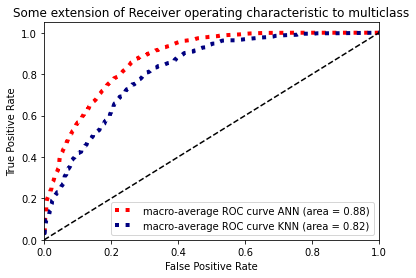

In [85]:
#roc curve stack comparing both models
plt.plot(
    ann_fpr,
    ann_tpr,
    label="macro-average ROC curve ANN (area = {0:0.2f})".format(ann_roc_auc["macro"]),
    color="red",
    linestyle=":",
    linewidth=4,
)
plt.plot(
    knn_fpr,
    knn_tpr,
    label="macro-average ROC curve KNN (area = {0:0.2f})".format(knn_roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

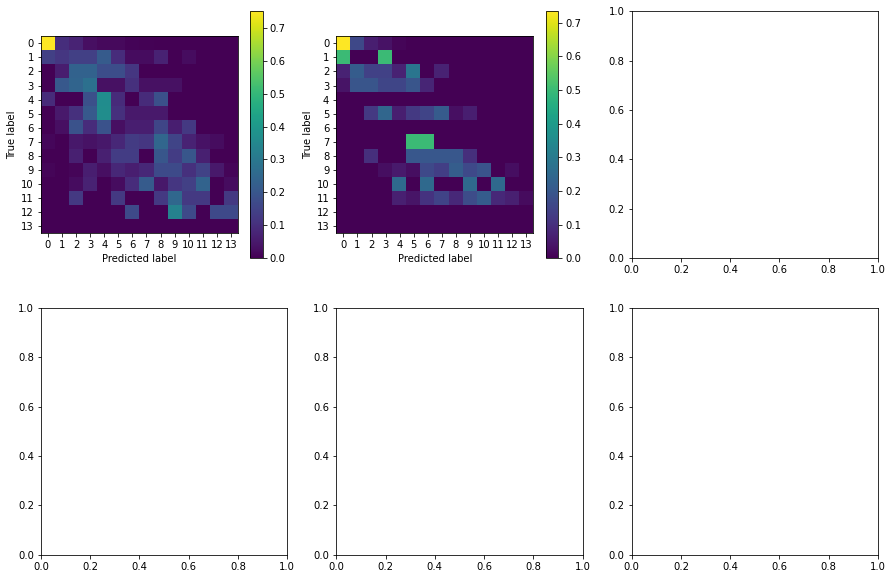

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pred_test=[knn_y_test,ann_y_test]
y_test=[knn_pred_test,ann_pred_test]

for  model_train,model_test,ax in zip(pred_test,y_test,axes.flatten()):
    ConfusionMatrixDisplay.from_predictions(model_train, model_test,include_values=False, normalize='true', ax=ax)
